In [30]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import numpy as np

# load data
iris = load_iris()
print iris.data.shape

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.10, random_state=42)

# initiate PCA
pca = PCA()

# transform 

X_transformed = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print d

(150, 4)
2


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.10)

# initiate PCA and classifier
pca = PCA(n_components = 2)
X_transformed = pca.fit_transform(X_train)

classifier = DecisionTreeClassifier(max_depth=3)

classifier.fit(X_transformed, y_train)

# predict "new" data
# (I'm faking it here by using the original data)

newdata = X_test

# transform new data using already fitted pca
# (don't re-fit the pca)
newdata_transformed = pca.transform(newdata)

# predict labels using the trained classifier

pred_labels = classifier.predict(newdata_transformed)
print accuracy_score(y_test, pred_labels)
print iris.target.shape

0.8
(150,)


In [72]:
n_samples, n_features = iris.data.shape
print(iris.keys())
print((n_samples, n_features))
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)

['target_names', 'data', 'target', 'DESCR', 'feature_names']
(150, 4)
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


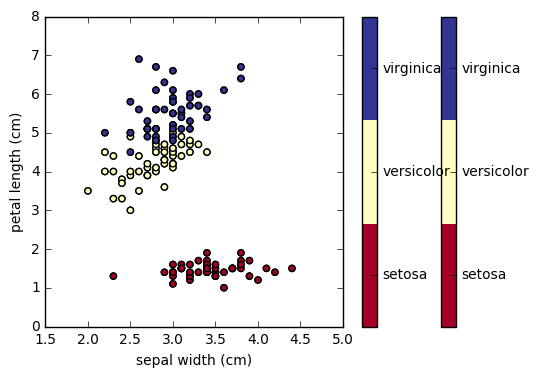

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# 'sepal width (cm)'
x_index = 1
# 'petal length (cm)'
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

(135,)
(135,)


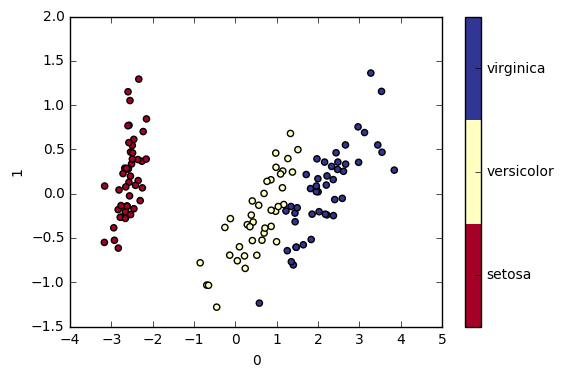

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 'sepal width (cm)'
x_index = 1
# 'petal length (cm)'
y_index = 2

print X_transformed[:,0].shape
print y_train.shape

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(X_transformed[:,0], X_transformed[:,1],
            c=y_train, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel('0')
plt.ylabel('1')
plt.show()

In [15]:
# you can make this a lot easier using Pipeline

from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree', DecisionTreeClassifier())])

pipe.fit(iris.data, iris.target)

pipe.predict(newdata)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.cross_validation import cross_val_score
print cross_val_score(pipe, iris.data, iris.target)

[ 0.96078431  0.92156863  1.        ]
